# Лабораторная 6. Проверка гипотез (параметрических и непараметрической) по выборке из биномиального закона распределения. 

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from random import randint
%matplotlib inline

## 1. Cгенерировать выборки (различного объема) из биномиального закона распределения с параметрами (n=20+№PC, p=1/(2*№PC)).

In [3]:
N = [48,100,200]
P = [1/56,0.85]
C = [20,1000,10000,100000]
z = [[n,p,c,'X~B(' + str(n) + ';' + str(p) + ')' + '\n Count of samples:' + str(c),np.random.binomial(n,p,c)] for n in N for p in P  for c in C ]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


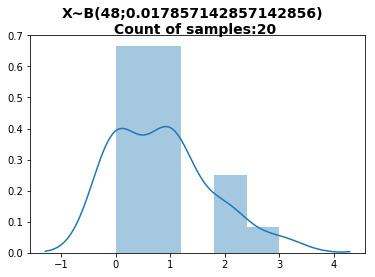

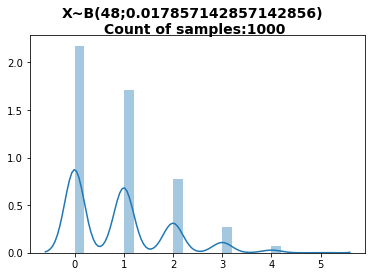

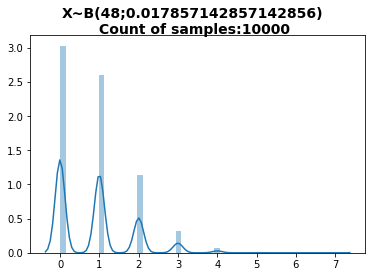

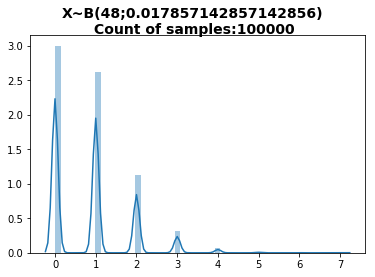

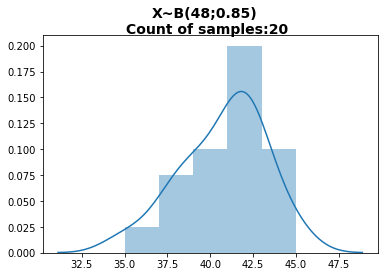

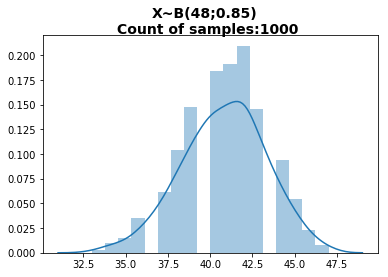

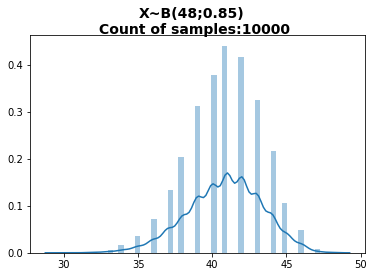

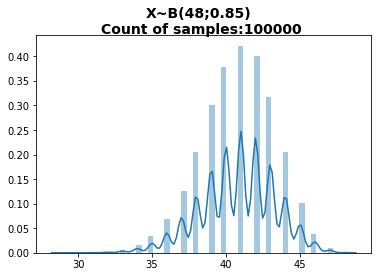

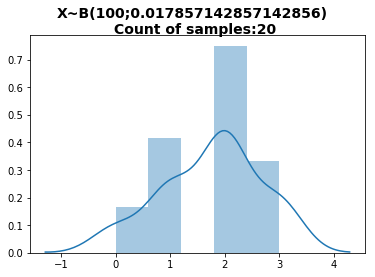

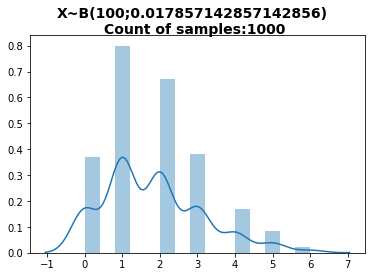

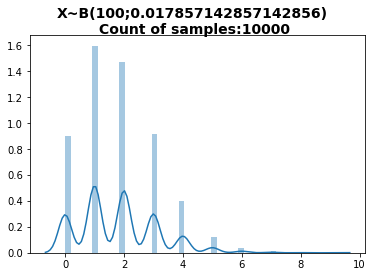

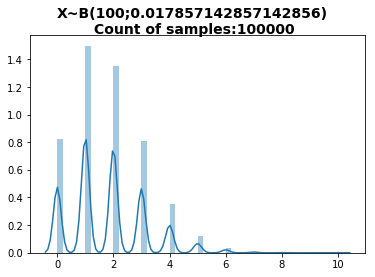

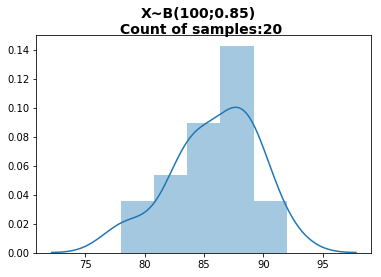

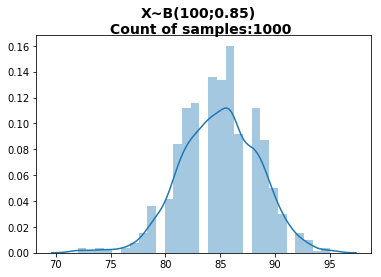

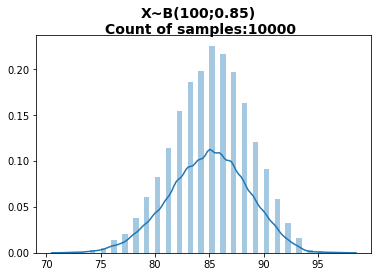

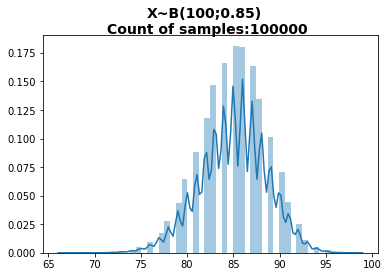

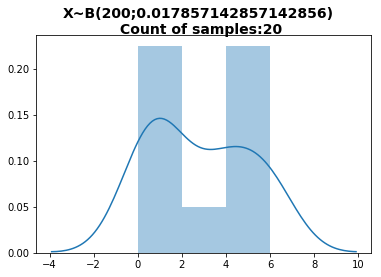

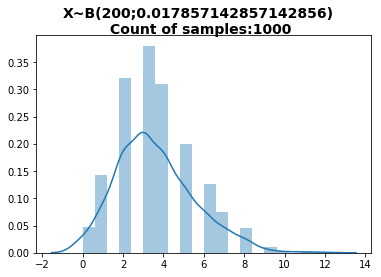

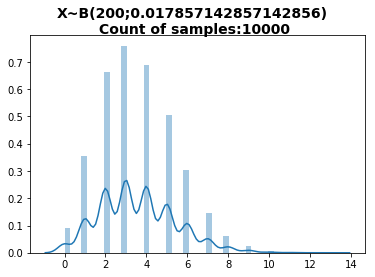

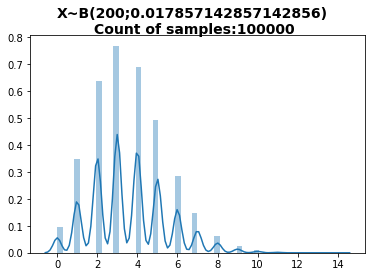

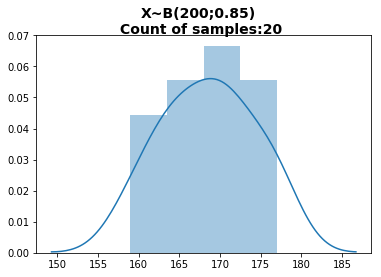

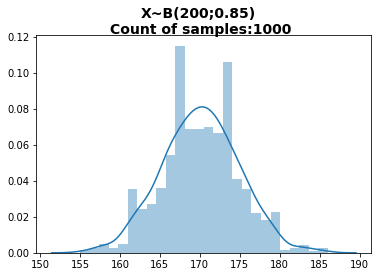

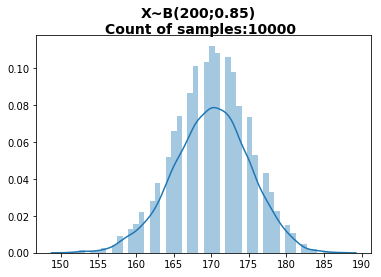

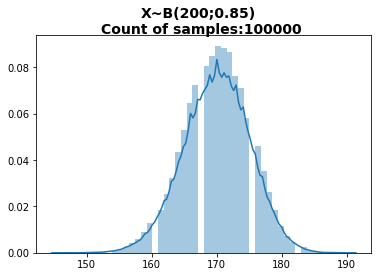

In [9]:
for t in z:
    fig = plt.figure()
    fig.suptitle(t[3], fontsize=14, fontweight='bold')
    sns.distplot(t[4:])

## 2. Провести статистический анализ этих выборок. Найти точечные и интервальные оценки различных числовых характеристик для каждой из  выборок. Проверить гипотезы о параметрах генеральной совокупности.

## 3. Проверить гипотезы о виде закона распределения генеральной совокупности.

In [10]:
def ChiSquareBinomialTest(ar,n,p):
    r = range(max(ar)+1)
    q = [0]*(max(ar)+1)
    for t in ar:
        q[t] = q[t]+1
    Bin = stat.binom(n,p)
    N = len(ar)
    Rprob = [q[i]/len(ar) for i in range(max(ar)+1)]
    Tprob = [Bin.cdf(i) for i in range(max(ar)+1) ]
    for i in range(1,max(ar)+1):
        Tprob[i] = Tprob[i]-Bin.cdf(i-1)
    answer = 0
    for i in range(len(Tprob)):
        answer = answer +  ((Rprob[i]-Tprob[i])**2)/Tprob[i]
    return N * answer

In [11]:
a = 0.2 # вероятность нахождения в доверитеьном интервале
for t in z:
    M = np.mean(t[4])
    D = np.var(t[4])
    n = len(t[4])
    print('Sample count:' + str(t[2]))
    print('Real P:' + str(t[1]))
    print('Real N:' + str(t[0]))
    print('Real M: ' + str(t[0]*t[1]))
    print('Real D: ' + str(t[0]*t[1]*(1-t[1])))
    print('calculated P: ' + str(M/t[0]))
    print('calculated M: ' + str(M))
    print('calculated D: ' + str(D))
    print('Chi2 a-value =',1 - stat.chi2.cdf(x = ChiSquareBinomialTest(t[4],t[0],t[1]),df = len(t[4])),'\n')

Sample count:20
Real P:0.017857142857142856
Real N:48
Real M: 0.8571428571428571
Real D: 0.8418367346938774
calculated P: 0.0177083333333
calculated M: 0.85
calculated D: 0.7275
Chi2 a-value = 1.0 

Sample count:1000
Real P:0.017857142857142856
Real N:48
Real M: 0.8571428571428571
Real D: 0.8418367346938774
calculated P: 0.0182083333333
calculated M: 0.874
calculated D: 0.932124
Chi2 a-value = 1.0 

Sample count:10000
Real P:0.017857142857142856
Real N:48
Real M: 0.8571428571428571
Real D: 0.8418367346938774
calculated P: 0.0177875
calculated M: 0.8538
calculated D: 0.83562556
Chi2 a-value = 1.0 

Sample count:100000
Real P:0.017857142857142856
Real N:48
Real M: 0.8571428571428571
Real D: 0.8418367346938774
calculated P: 0.01794
calculated M: 0.86112
calculated D: 0.8458323456
Chi2 a-value = 1.0 

Sample count:20
Real P:0.85
Real N:48
Real M: 40.8
Real D: 6.12
calculated P: 0.848958333333
calculated M: 40.75
calculated D: 5.8875
Chi2 a-value = 0.996671933038 

Sample count:1000
Real P: